<a href="https://colab.research.google.com/github/dzakiAdip/216_prakDATMIN/blob/main/praktik5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prak. DATMIN Pert. 5**<br>
### Materi: Klasifikasi Data

---
## Praktikan: Muhammad <u>**Thoriq Dzaki**</u><br>
## NIM: 23000 18<u>**216**<u/>

# Import Library

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer
from subprocess import check_call
from IPython.display import Image
import numpy as np

# Persiapan Data

In [2]:
df = pd.read_excel('Data_Alumni.xlsx')
df


,No,Nim,Nama,TTL,FakDanProdi,Alamat,Masuk,Status,Lulus,Lama_tunggu,Gaji,Toefl,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,Mahasiwa,2016,2.4,1.475635e+06,390.0,2.13
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,Mahasiwa,2016,NaN,NaN,NaN,NaN
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,Mahasiwa,2016,2.4,1.475635e+06,NaN,NaN
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,Mahasiwa,2016,2.4,1.475634e+06,413.0,2.75
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,Mahasiwa,2016,NaN,NaN,NaN,NaN
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,Wiraswasta,2016,2.4,1.475635e+06,400.0,3.24
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,Guru,2016,2.4,1.475635e+06,396.0,3.27
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,Mahasiwa,2016,2.4,1.475635e+06,460.0,3.20
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,Mahasiwa,2016,0.0,6.000000e+05,403.0,3.24
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,Guru,2016,2.4,1.475635e+06,450.0,3.06


# Data Preprocessing

In [3]:
meanIPK=df.IPK.mean()
meanTOEFL=df.Toefl.mean()
meanLama=df.Lama_tunggu.mean()
meanGaji=df.Gaji.mean()

In [4]:
df['IPK'] = df['IPK'].fillna(meanIPK)
df['Toefl'] = df['Toefl'].fillna(meanTOEFL)
df['Lama_tunggu'] = df['Lama_tunggu'].fillna(meanLama)
df['Gaji'] = df['Gaji'].fillna(meanGaji)

In [5]:
df


,No,Nim,Nama,TTL,FakDanProdi,Alamat,Masuk,Status,Lulus,Lama_tunggu,Gaji,Toefl,IPK
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,Mahasiwa,2016,2.400000,1.475635e+06,390.000000,2.130000
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,Mahasiwa,2016,2.400000,1.475635e+06,419.769231,3.156154
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,Mahasiwa,2016,2.400000,1.475634e+06,413.000000,2.750000
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,Wiraswasta,2016,2.400000,1.475635e+06,400.000000,3.240000
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,Guru,2016,2.400000,1.475635e+06,396.000000,3.270000
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,Mahasiwa,2016,2.400000,1.475635e+06,460.000000,3.200000
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,Mahasiwa,2016,0.000000,6.000000e+05,403.000000,3.240000
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,Guru,2016,2.400000,1.475635e+06,450.000000,3.060000


In [6]:
for index, row in df.iterrows():
    df.loc[index, 'Tahun_lahir'] = row['TTL'][-4:]
df

,No,Nim,Nama,TTL,FakDanProdi,Alamat,Masuk,Status,Lulus,Lama_tunggu,Gaji,Toefl,IPK,Tahun_lahir
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,Mahasiwa,2016,2.400000,1.475635e+06,390.000000,2.130000,1989
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1994
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,Mahasiwa,2016,2.400000,1.475635e+06,419.769231,3.156154,1995
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,Mahasiwa,2016,2.400000,1.475634e+06,413.000000,2.750000,1990
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1991
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,Wiraswasta,2016,2.400000,1.475635e+06,400.000000,3.240000,1992
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,Guru,2016,2.400000,1.475635e+06,396.000000,3.270000,1994
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,Mahasiwa,2016,2.400000,1.475635e+06,460.000000,3.200000,1993
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,Mahasiwa,2016,0.000000,6.000000e+05,403.000000,3.240000,1991
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,Guru,2016,2.400000,1.475635e+06,450.000000,3.060000,1991


In [7]:
from datetime import datetime
now = datetime.now()

now.year
for index, row in df.iterrows():
    df.loc[index, 'Umur']=now.year - int (row['Tahun_lahir'])
df

,No,Nim,Nama,TTL,FakDanProdi,Alamat,Masuk,Status,Lulus,Lama_tunggu,Gaji,Toefl,IPK,Tahun_lahir,Umur
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,Mahasiwa,2016,2.400000,1.475635e+06,390.000000,2.130000,1989,36.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1994,31.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,Mahasiwa,2016,2.400000,1.475635e+06,419.769231,3.156154,1995,30.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,Mahasiwa,2016,2.400000,1.475634e+06,413.000000,2.750000,1990,35.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1991,34.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,Wiraswasta,2016,2.400000,1.475635e+06,400.000000,3.240000,1992,33.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,Guru,2016,2.400000,1.475635e+06,396.000000,3.270000,1994,31.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,Mahasiwa,2016,2.400000,1.475635e+06,460.000000,3.200000,1993,32.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,Mahasiwa,2016,0.000000,6.000000e+05,403.000000,3.240000,1991,34.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,Guru,2016,2.400000,1.475635e+06,450.000000,3.060000,1991,34.0


In [8]:
for index, row in df.iterrows():
    df.loc[index, 'Masa_studi']=row['Lulus'] - row['Masuk']
df

,No,Nim,Nama,TTL,FakDanProdi,Alamat,Masuk,Status,Lulus,Lama_tunggu,Gaji,Toefl,IPK,Tahun_lahir,Umur,Masa_studi
0,1,9018263,Puguh Drajat E.P,"Purworejo, 4 November 1989",FTI / Teknik Iformatika,Tangerang Rt. 01/ 0,2009,Mahasiwa,2016,2.400000,1.475635e+06,390.000000,2.130000,1989,36.0,7.0
1,2,12022030,Arsyad Cahya Subrata,"Bantul, 21 juni 1994",FTI / Teknik Elektro,"Karangpule Rt.01 , Tirtonirmolo , Kasihan Bantul",2012,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1994,31.0,4.0
2,3,12020021,Yesi Novela,"Tempilang, 1 januari 1995",FTI,NaN,2012,Mahasiwa,2016,2.400000,1.475635e+06,419.769231,3.156154,1995,30.0,4.0
3,4,9018269,Pandu Herwijaya,"Lampung, 19 Desember 1990",FTI/ Teknik Infomatika,"Tamantirto, Kasihan ,Bantul",2009,Mahasiwa,2016,2.400000,1.475634e+06,413.000000,2.750000,1990,35.0,7.0
4,5,9018109,Anjar Prasetyo,"Gunungkidul, 27 April 1991",FTI /Teknik Informatika,"Umbulharjo , Yogyakarta",2009,Mahasiwa,2016,1.957143,1.343310e+06,419.769231,3.156154,1991,34.0,7.0
5,6,9020026,Moh. Dadi Kurniawan,"Savanajaya, 27 Maret 1992",FTI / Futsal,Saren Rt. 02 Rw. 01 Caturtunggal,2009,Wiraswasta,2016,2.400000,1.475635e+06,400.000000,3.240000,1992,33.0,7.0
6,7,12018060,Martin Sarlina,"Lepak, 23 Maret 1994",FTI,NTB,2012,Guru,2016,2.400000,1.475635e+06,396.000000,3.270000,1994,31.0,4.0
7,8,11018022,Yan Adhi Permadi,"Jepara, 22 juni 1993",FTI,Umbulharjo V,2011,Mahasiwa,2016,2.400000,1.475635e+06,460.000000,3.200000,1993,32.0,5.0
8,9,9018212,Achicha Wahyuni,"Yogyakarta, 3 juni 1991",FTI/ Web Design,"Noyokerten, Sendangirto, Berbah",2009,Mahasiwa,2016,0.000000,6.000000e+05,403.000000,3.240000,1991,34.0,7.0
9,10,9018301,Yayan Tisna Permadi,"Purbalingga, 08 Oktober 1991",FTI/ Teknik Inormatika,"Tajug, Rt.04/ 05 Purbalingga",2009,Guru,2016,2.400000,1.475635e+06,450.000000,3.060000,1991,34.0,7.0


In [9]:
d_train = df[['Nim','Umur','IPK','Masa_studi','Lama_tunggu','Gaji','Toefl']].reset_index(drop=True)
d_train


,Nim,Umur,IPK,Masa_studi,Lama_tunggu,Gaji,Toefl
0,9018263,36.0,2.130000,7.0,2.400000,1.475635e+06,390.000000
1,12022030,31.0,3.156154,4.0,1.957143,1.343310e+06,419.769231
2,12020021,30.0,3.156154,4.0,2.400000,1.475635e+06,419.769231
3,9018269,35.0,2.750000,7.0,2.400000,1.475634e+06,413.000000
4,9018109,34.0,3.156154,7.0,1.957143,1.343310e+06,419.769231
5,9020026,33.0,3.240000,7.0,2.400000,1.475635e+06,400.000000
6,12018060,31.0,3.270000,4.0,2.400000,1.475635e+06,396.000000
7,11018022,32.0,3.200000,5.0,2.400000,1.475635e+06,460.000000
8,9018212,34.0,3.240000,7.0,0.000000,6.000000e+05,403.000000
9,9018301,34.0,3.060000,7.0,2.400000,1.475635e+06,450.000000


In [10]:
for index, row in d_train.iterrows():
    if row['Lama_tunggu'] >=2:
        d_train.loc[index, 'LamaTunggu'] = 'lama'
    elif row['Lama_tunggu'] >=1:
        d_train.loc[index, 'LamaTunggu'] = 'sedang'
    else:
        d_train.loc[index, 'LamaTunggu'] = 'cepat'
d_train

,Nim,Umur,IPK,Masa_studi,Lama_tunggu,Gaji,Toefl,LamaTunggu
0,9018263,36.0,2.130000,7.0,2.400000,1.475635e+06,390.000000,lama
1,12022030,31.0,3.156154,4.0,1.957143,1.343310e+06,419.769231,sedang
2,12020021,30.0,3.156154,4.0,2.400000,1.475635e+06,419.769231,lama
3,9018269,35.0,2.750000,7.0,2.400000,1.475634e+06,413.000000,lama
4,9018109,34.0,3.156154,7.0,1.957143,1.343310e+06,419.769231,sedang
5,9020026,33.0,3.240000,7.0,2.400000,1.475635e+06,400.000000,lama
6,12018060,31.0,3.270000,4.0,2.400000,1.475635e+06,396.000000,lama
7,11018022,32.0,3.200000,5.0,2.400000,1.475635e+06,460.000000,lama
8,9018212,34.0,3.240000,7.0,0.000000,6.000000e+05,403.000000,cepat
9,9018301,34.0,3.060000,7.0,2.400000,1.475635e+06,450.000000,lama


In [11]:
y = d_train['LamaTunggu'].values
y

array(['lama', 'sedang', 'lama', 'lama', 'sedang', 'lama', 'lama', 'lama',
       'cepat', 'lama', 'lama', 'lama', 'lama', 'lama', 'sedang', 'cepat'],
      dtype=object)

In [12]:
columns = ['IPK', 'Toefl','Masa_studi','Umur']
features = d_train[list(columns)].values
features

array([[  2.13      , 390.        ,   7.        ,  36.        ],
       [  3.15615385, 419.76923077,   4.        ,  31.        ],
       [  3.15615385, 419.76923077,   4.        ,  30.        ],
       [  2.75      , 413.        ,   7.        ,  35.        ],
       [  3.15615385, 419.76923077,   7.        ,  34.        ],
       [  3.24      , 400.        ,   7.        ,  33.        ],
       [  3.27      , 396.        ,   4.        ,  31.        ],
       [  3.2       , 460.        ,   5.        ,  32.        ],
       [  3.24      , 403.        ,   7.        ,  34.        ],
       [  3.06      , 450.        ,   7.        ,  34.        ],
       [  3.47      , 423.        ,   4.        ,  33.        ],
       [  3.62      , 413.        ,   4.        ,  30.        ],
       [  3.32      , 480.        ,   4.        ,  33.        ],
       [  3.14      , 406.        ,   5.        ,  33.        ],
       [  2.99      , 423.        ,   7.        ,  34.        ],
       [  3.6       , 400

In [13]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None, copy=True)
x = imputer.fit_transform(features)
x


array([[  2.13      , 390.        ,   7.        ,  36.        ],
       [  3.15615385, 419.76923077,   4.        ,  31.        ],
       [  3.15615385, 419.76923077,   4.        ,  30.        ],
       [  2.75      , 413.        ,   7.        ,  35.        ],
       [  3.15615385, 419.76923077,   7.        ,  34.        ],
       [  3.24      , 400.        ,   7.        ,  33.        ],
       [  3.27      , 396.        ,   4.        ,  31.        ],
       [  3.2       , 460.        ,   5.        ,  32.        ],
       [  3.24      , 403.        ,   7.        ,  34.        ],
       [  3.06      , 450.        ,   7.        ,  34.        ],
       [  3.47      , 423.        ,   4.        ,  33.        ],
       [  3.62      , 413.        ,   4.        ,  30.        ],
       [  3.32      , 480.        ,   4.        ,  33.        ],
       [  3.14      , 406.        ,   5.        ,  33.        ],
       [  2.99      , 423.        ,   7.        ,  34.        ],
       [  3.6       , 400

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

# Modeling

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(x_train, y_train)
predict = clf.predict(x_test)

In [16]:
with open("Graph_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names = columns, filled=True, rounded=True, special_characters = True)

In [17]:
check_call(['dot', '-Tpng', 'Graph_tree.dot', '-o', 'Graph_tree.png'])

0

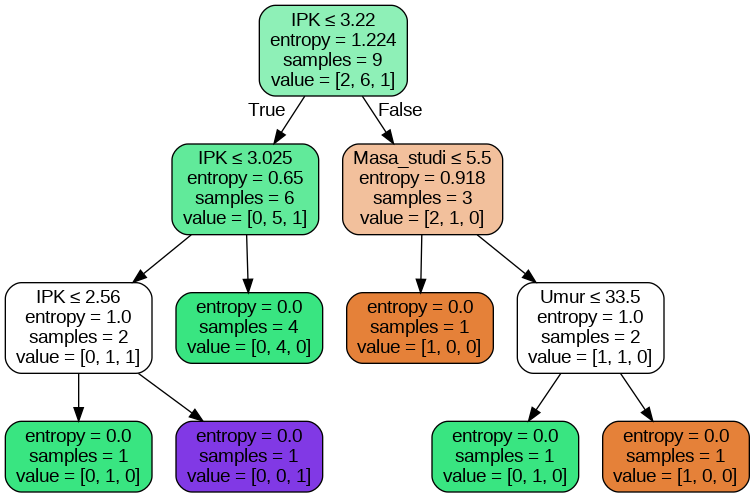

In [18]:
Image(filename='Graph_tree.png')

# Evaluasi

<function matplotlib.pyplot.show(close=None, block=None)>

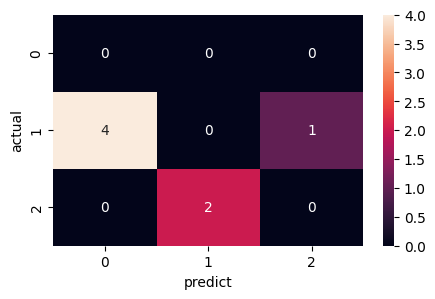

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,3))
sns.heatmap(confusion_matrix(y_test, predict), annot=True, fmt='.0f', ax=ax)
plt.xlabel("predict")
plt.ylabel("actual")
plt.show

In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

       cepat       0.00      0.00      0.00       0.0
        lama       0.00      0.00      0.00       5.0
      sedang       0.00      0.00      0.00       2.0

    accuracy                           0.00       7.0
   macro avg       0.00      0.00      0.00       7.0
weighted avg       0.00      0.00      0.00       7.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predict)

0.0